In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [40]:
import warnings

warnings.filterwarnings('ignore')

In [41]:
data = 'depfin.csv'

df = pd.read_csv(data, header=None)

In [42]:
df.shape

(1004, 13)

In [43]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,18,70,Good,8,Yes,Single,3,Good,No,No,No,No,Yes
1,18,60,Normal,10,Yes,Single,3,Good,No,No,No,No,Yes
2,19,70,Good,8,Yes,Single,4,Good,Yes,Yes,No,No,Yes
3,19,50,Normal,6,Yes,Single,2,Good,No,Yes,No,Yes,No
4,18,90,Good,10,Yes,Single,2,Good,No,Yes,No,No,Yes


In [44]:
col_names = ['age', 'scale', 'feeling', 'sleep', 'finance', 'relation', 'adjustment','understanding','result','living','inferiority','sick','recreation']


df.columns = col_names

col_names

['age',
 'scale',
 'feeling',
 'sleep',
 'finance',
 'relation',
 'adjustment',
 'understanding',
 'result',
 'living',
 'inferiority',
 'sick',
 'recreation']

In [45]:
df.head()

,age,scale,feeling,sleep,finance,relation,adjustment,understanding,result,living,inferiority,sick,recreation
0,18,70,Good,8,Yes,Single,3,Good,No,No,No,No,Yes
1,18,60,Normal,10,Yes,Single,3,Good,No,No,No,No,Yes
2,19,70,Good,8,Yes,Single,4,Good,Yes,Yes,No,No,Yes
3,19,50,Normal,6,Yes,Single,2,Good,No,Yes,No,Yes,No
4,18,90,Good,10,Yes,Single,2,Good,No,Yes,No,No,Yes


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            1004 non-null   int64 
 1   scale          1004 non-null   int64 
 2   feeling        1004 non-null   object
 3   sleep          1004 non-null   int64 
 4   finance        1004 non-null   object
 5   relation       1004 non-null   object
 6   adjustment     1004 non-null   int64 
 7   understanding  1004 non-null   object
 8   result         1004 non-null   object
 9   living         1004 non-null   object
 10  inferiority    1004 non-null   object
 11  sick           1004 non-null   object
 12  recreation     1004 non-null   object
dtypes: int64(4), object(9)
memory usage: 102.1+ KB


In [47]:
col_names = ['age', 'scale', 'feeling', 'sleep', 'finance', 'relation', 'adjustment','understanding','result','living','inferiority','sick','recreation']

for col in col_names:
    print(df[col].value_counts())

19    270
21    262
20    240
22    180
23     45
18      7
Name: age, dtype: int64
30     148
85     108
70     101
10      94
90      89
45      78
5       74
55      74
25      73
50      71
75      38
65      10
15       9
35       8
100      7
20       6
80       5
95       5
40       4
60       2
Name: scale, dtype: int64
Bad          229
Normal       223
Very good    221
Very bad     180
Good         151
Name: feeling, dtype: int64
3     222
5     206
6     154
8     150
2      91
1      82
7      79
4      15
10      5
Name: sleep, dtype: int64
Yes    511
No     493
Name: finance, dtype: int64
Single               410
It's complicated     224
In a relationship    189
Broken Up            166
Married               15
Name: relation, dtype: int64
2    235
3    224
5    216
1    184
4    145
Name: adjustment, dtype: int64
Bad       397
Good      366
Normal    241
Name: understanding, dtype: int64
Yes    565
No     439
Name: result, dtype: int64
No     537
Yes    467
Name: living, 

In [48]:
df['feeling'].value_counts()

Bad          229
Normal       223
Very good    221
Very bad     180
Good         151
Name: feeling, dtype: int64

In [49]:
df.isnull().sum()

age              0
scale            0
feeling          0
sleep            0
finance          0
relation         0
adjustment       0
understanding    0
result           0
living           0
inferiority      0
sick             0
recreation       0
dtype: int64

In [50]:
X = df.drop(['feeling'], axis=1)

y = df['feeling']

In [51]:
y

0            Good
1          Normal
2            Good
3          Normal
4            Good
          ...    
999           Bad
1000     Very bad
1001    Very good
1002       Normal
1003          Bad
Name: feeling, Length: 1004, dtype: object

In [52]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((803, 12), (201, 12))

In [54]:
# check data types in X_train

X_train.dtypes

age               int64
scale             int64
sleep             int64
finance          object
relation         object
adjustment        int64
understanding    object
result           object
living           object
inferiority      object
sick             object
recreation       object
dtype: object

In [55]:
X_train.head()

,age,scale,sleep,finance,relation,adjustment,understanding,result,living,inferiority,sick,recreation
78,21,45,6,Yes,In a relationship,3,Normal,No,Yes,Yes,No,Yes
29,21,55,6,Yes,In a relationship,3,Normal,Yes,Yes,No,Yes,No
280,20,30,3,Yes,It's complicated,2,Bad,No,No,Yes,Yes,No
507,22,25,3,No,Single,2,Bad,No,No,Yes,Yes,No
652,19,90,8,Yes,Single,5,Good,Yes,Yes,No,No,Yes


In [56]:
# import category encoders
!pip install category-encoders
import category_encoders as ce

In [57]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['finance', 'relation', 'understanding', 'result', 'living', 'inferiority','sick','recreation'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [58]:
X_train.head()

,age,scale,sleep,finance,relation,adjustment,understanding,result,living,inferiority,sick,recreation
78,21,45,6,1,1,3,1,1,1,1,1,1
29,21,55,6,1,1,3,1,2,1,2,2,2
280,20,30,3,1,2,2,2,1,2,1,2,2
507,22,25,3,2,3,2,2,1,2,1,2,2
652,19,90,8,1,3,5,3,2,1,2,1,1


In [59]:
encodery = ce.OrdinalEncoder(cols=['feeling'])

y_train = encodery.fit_transform(y_train)
y_test = encodery.transform(y_test)

In [60]:
y_train.head(20)

,feeling
78,1
29,1
280,2
507,2
652,3
946,1
289,1
165,4
761,3
497,1


In [61]:
X_test.head()

,age,scale,sleep,finance,relation,adjustment,understanding,result,living,inferiority,sick,recreation
926,21,50,5,1,3,3,1,2,2,2,1,2
630,21,50,5,1,3,3,1,2,2,2,1,2
682,21,45,5,2,2,3,1,2,2,2,1,2
514,21,45,5,2,2,3,1,2,2,2,1,2
365,19,45,7,1,1,4,1,2,2,2,1,1


In [62]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [63]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)

In [64]:
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [65]:
y_pred= classifier.predict(X_test)  

In [66]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  

In [67]:
y_pred

array([1, 1, 1, 1, 1, 2, 4, 3, 1, 1, 1, 4, 2, 5, 1, 2, 3, 1, 1, 5, 2, 5,
       2, 4, 3, 1, 4, 5, 1, 2, 5, 3, 3, 5, 1, 2, 5, 2, 4, 5, 3, 1, 5, 4,
       1, 5, 2, 4, 2, 1, 5, 1, 1, 3, 1, 2, 1, 2, 4, 3, 3, 3, 1, 4, 3, 3,
       3, 2, 3, 5, 3, 4, 3, 1, 4, 2, 4, 3, 4, 2, 2, 4, 5, 4, 4, 1, 1, 4,
       4, 1, 1, 4, 4, 4, 5, 4, 4, 2, 5, 5, 1, 4, 3, 3, 3, 3, 2, 2, 2, 1,
       5, 3, 1, 5, 3, 4, 4, 3, 1, 4, 5, 3, 4, 5, 3, 5, 1, 3, 1, 4, 2, 4,
       5, 5, 2, 2, 5, 1, 4, 4, 1, 4, 1, 3, 4, 1, 3, 1, 1, 1, 5, 1, 3, 4,
       1, 3, 2, 2, 3, 2, 3, 2, 2, 5, 3, 1, 3, 1, 5, 2, 5, 2, 4, 5, 3, 4,
       4, 5, 3, 5, 4, 3, 4, 3, 5, 2, 2, 5, 5, 4, 5, 3, 1, 5, 3, 2, 1, 1,
       4, 4, 2])

In [68]:
X_test.head(10)

,age,scale,sleep,finance,relation,adjustment,understanding,result,living,inferiority,sick,recreation
926,21,50,5,1,3,3,1,2,2,2,1,2
630,21,50,5,1,3,3,1,2,2,2,1,2
682,21,45,5,2,2,3,1,2,2,2,1,2
514,21,45,5,2,2,3,1,2,2,2,1,2
365,19,45,7,1,1,4,1,2,2,2,1,1
655,22,30,3,2,2,2,2,1,1,1,2,2
656,19,10,2,2,4,1,2,1,2,1,2,2
529,20,85,7,1,3,5,3,2,1,2,1,1
321,21,55,5,2,1,3,1,2,2,2,1,2
70,21,45,6,1,3,3,1,2,2,2,1,1


In [69]:
y_test.head(10)

,feeling
926,1
630,1
682,1
514,1
365,4
655,2
656,4
529,3
321,1
70,1


In [70]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion entropy: 0.9751


In [71]:
y_pred_train = classifier.predict(X_train)

y_pred_train

array([1, 1, 2, 2, 3, 1, 1, 4, 3, 1, 5, 3, 1, 1, 2, 1, 2, 3, 1, 2, 1, 4,
       4, 3, 3, 1, 5, 3, 4, 3, 1, 4, 1, 5, 3, 5, 3, 5, 2, 4, 3, 1, 2, 4,
       1, 1, 4, 3, 5, 3, 3, 5, 2, 1, 2, 5, 3, 1, 1, 2, 1, 5, 5, 2, 3, 4,
       3, 5, 4, 5, 5, 5, 2, 5, 2, 4, 2, 1, 2, 1, 2, 3, 4, 1, 2, 5, 3, 1,
       5, 3, 3, 3, 4, 3, 2, 3, 5, 4, 2, 3, 1, 2, 4, 3, 4, 1, 4, 2, 3, 1,
       2, 1, 3, 3, 2, 3, 2, 1, 1, 3, 4, 1, 1, 2, 2, 1, 2, 1, 3, 1, 4, 4,
       2, 5, 2, 5, 2, 1, 5, 3, 1, 5, 3, 5, 3, 5, 2, 1, 2, 5, 2, 3, 3, 2,
       2, 1, 2, 5, 2, 2, 5, 3, 4, 2, 1, 3, 1, 1, 5, 3, 5, 1, 3, 1, 3, 4,
       1, 2, 3, 2, 2, 2, 2, 3, 2, 4, 4, 3, 2, 1, 3, 5, 1, 2, 3, 5, 2, 1,
       1, 2, 4, 5, 1, 2, 5, 1, 4, 1, 3, 3, 2, 1, 3, 3, 4, 2, 1, 3, 1, 5,
       4, 2, 2, 5, 1, 1, 2, 4, 5, 1, 2, 4, 4, 2, 1, 5, 3, 1, 1, 3, 2, 1,
       2, 2, 2, 2, 2, 2, 4, 5, 2, 5, 1, 4, 5, 3, 1, 3, 3, 1, 1, 3, 1, 3,
       2, 1, 2, 2, 5, 4, 2, 4, 4, 3, 3, 4, 4, 5, 3, 3, 5, 2, 3, 5, 2, 2,
       3, 3, 2, 4, 4, 4, 3, 4, 3, 5, 4, 2, 1, 5, 1,

In [72]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 1.0000


In [73]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9751


[Text(342.40909090909093, 403.81714285714287, 'X[5] <= 2.5\nentropy = 2.296\nsamples = 803\nvalue = [178, 195, 179, 135, 116]'),
 Text(136.96363636363637, 341.69142857142856, 'X[1] <= 17.5\nentropy = 1.13\nsamples = 337\nvalue = [1, 195, 2, 135, 4]'),
 Text(106.52727272727273, 279.5657142857143, 'entropy = 0.0\nsamples = 134\nvalue = [0, 0, 0, 134, 0]'),
 Text(167.4, 279.5657142857143, 'X[6] <= 1.5\nentropy = 0.309\nsamples = 203\nvalue = [1, 195, 2, 1, 4]'),
 Text(60.872727272727275, 217.44, 'X[1] <= 22.5\nentropy = 1.53\nsamples = 9\nvalue = [0, 4, 2, 0, 3]'),
 Text(30.436363636363637, 155.3142857142857, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 0, 0, 3]'),
 Text(91.30909090909091, 155.3142857142857, 'X[11] <= 1.5\nentropy = 0.918\nsamples = 6\nvalue = [0, 4, 2, 0, 0]'),
 Text(60.872727272727275, 93.18857142857144, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0]'),
 Text(121.74545454545455, 93.18857142857144, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4, 0, 0, 0]'),
 Text(273.92

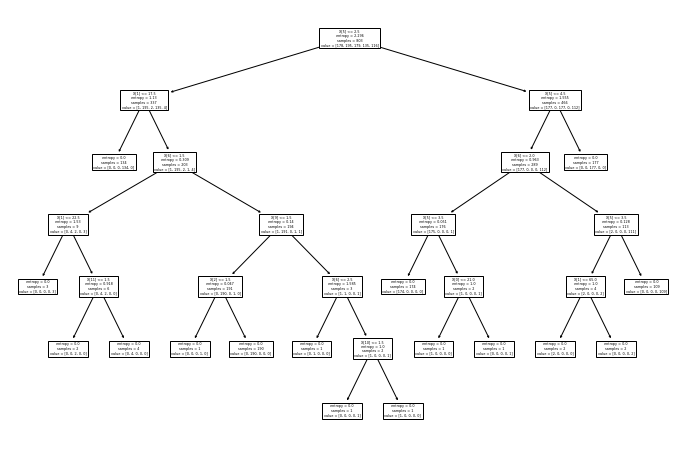

In [74]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(classifier.fit(X_train, y_train))

In [75]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[45  0  0  0  0]
 [ 0 33  0  0  1]
 [ 0  1 41  0  0]
 [ 1  0  0 43  1]
 [ 1  0  0  0 34]]


In [76]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        45
           2       0.97      0.97      0.97        34
           3       1.00      0.98      0.99        42
           4       1.00      0.96      0.98        45
           5       0.94      0.97      0.96        35

    accuracy                           0.98       201
   macro avg       0.97      0.97      0.97       201
weighted avg       0.98      0.98      0.98       201

